In [1]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
Abhi = pd.read_csv("/content/gdrive/MyDrive/jedit1.csv")
Abhi.shape

(492, 8)

In [5]:
Abhi.head()

,wmc,dit,noc,cbo,rfc,lcom,loc,fault
0,2,3,0,9,16,1,113,0
1,4,3,0,1,8,4,82,0
2,18,1,0,16,55,0,687,1
3,6,6,0,4,36,1,464,0
4,4,1,0,26,29,6,213,0


In [6]:
X = Abhi.drop('fault', axis=1)
y = Abhi['fault']

In [7]:
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('sig', SVC(kernel='sigmoid')))
	level0.append(('lin', SVC(kernel='linear')))
	level0.append(('poly', SVC(kernel='poly')))
	level0.append(('rbf', SVC(kernel='rbf')))
	# define meta learner model
	level1 = SVC(kernel='rbf')
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return model

In [8]:
def get_models():
	models = dict()
	models['stacking'] = get_stacking()
	return models

In [9]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
def evaluate_model(model, X, y):
	kfold_validation=KFold(4)
	scores = cross_val_score(model,X,y,cv=kfold_validation)
	return scores

In [10]:
models = get_models()

In [11]:
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>stacking 0.978 (0.016)


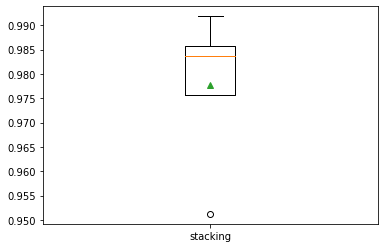

In [12]:
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()